In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# seaborn-compatible style
sns.set_style('whitegrid')

In [2]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
# Basic data exploration
def print_basic_info(df, name):
    print(f"\n{name} Dataset Info:")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    print(df.columns.tolist())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nData Types:")
    print(df.dtypes)


In [4]:
print_basic_info(customers_df, "Customers")
print_basic_info(products_df, "Products")
print_basic_info(transactions_df, "Transactions")


Customers Dataset Info:
--------------------------------------------------
Shape: (200, 4)

Columns:
['CustomerID', 'CustomerName', 'Region', 'SignupDate']

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Data Types:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Products Dataset Info:
--------------------------------------------------
Shape: (100, 4)

Columns:
['ProductID', 'ProductName', 'Category', 'Price']

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Data Types:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Transactions Dataset Info:
--------------------------------------------------
Shape: (1000, 7)

Columns:
['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']

Missing Values:
TransactionID      0
CustomerID 

In [5]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

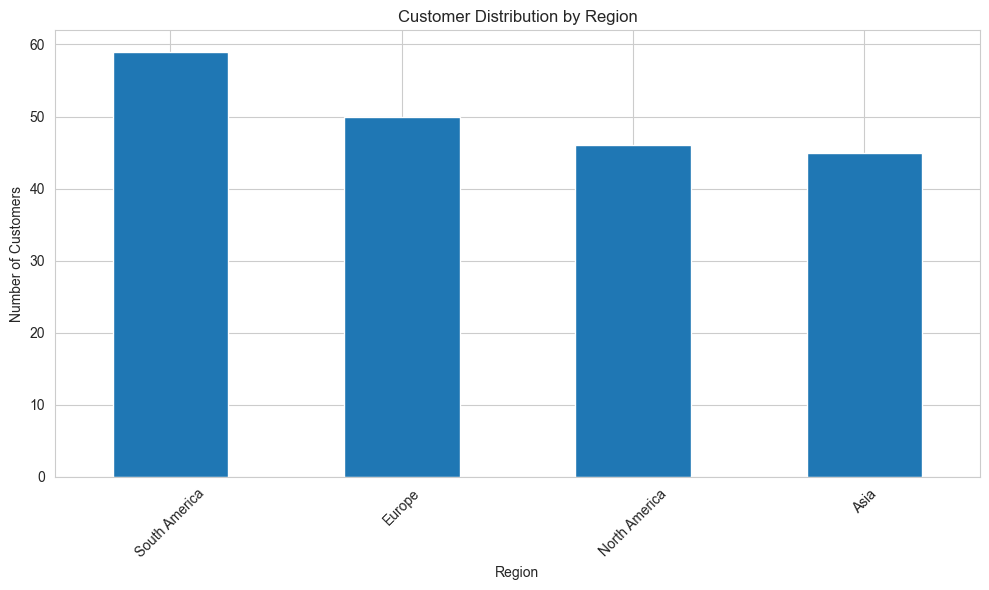

In [6]:
# Customer Analysis
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

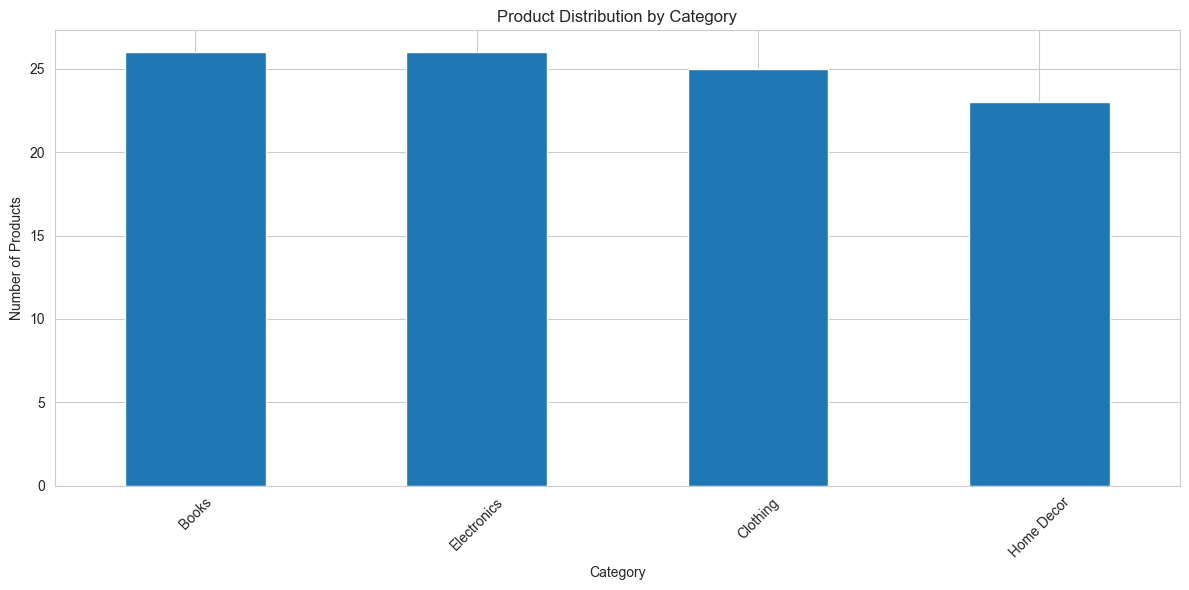

In [7]:
# Product Analysis
plt.figure(figsize=(12, 6))
products_df['Category'].value_counts().plot(kind='bar')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

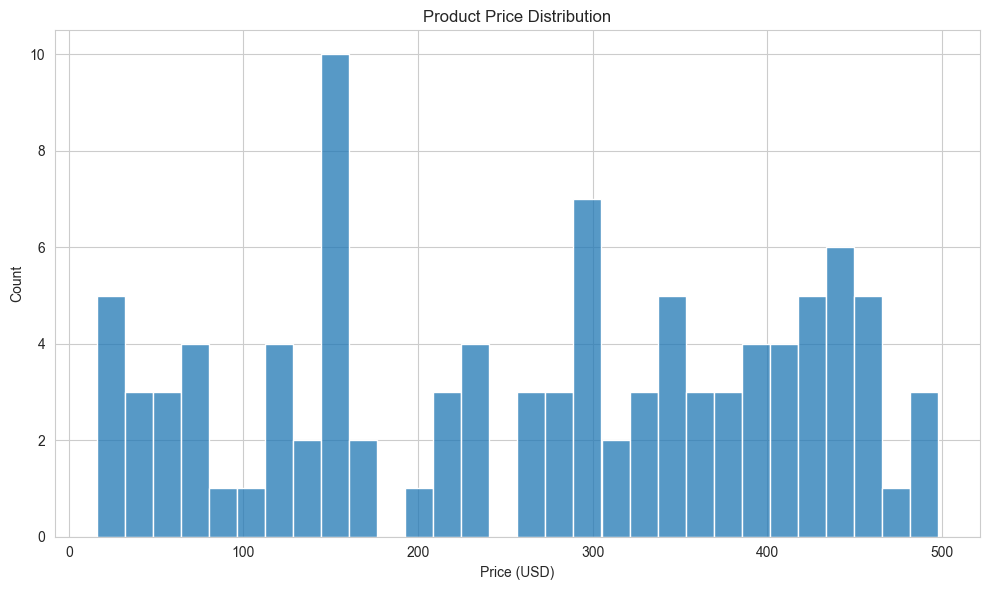

In [8]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

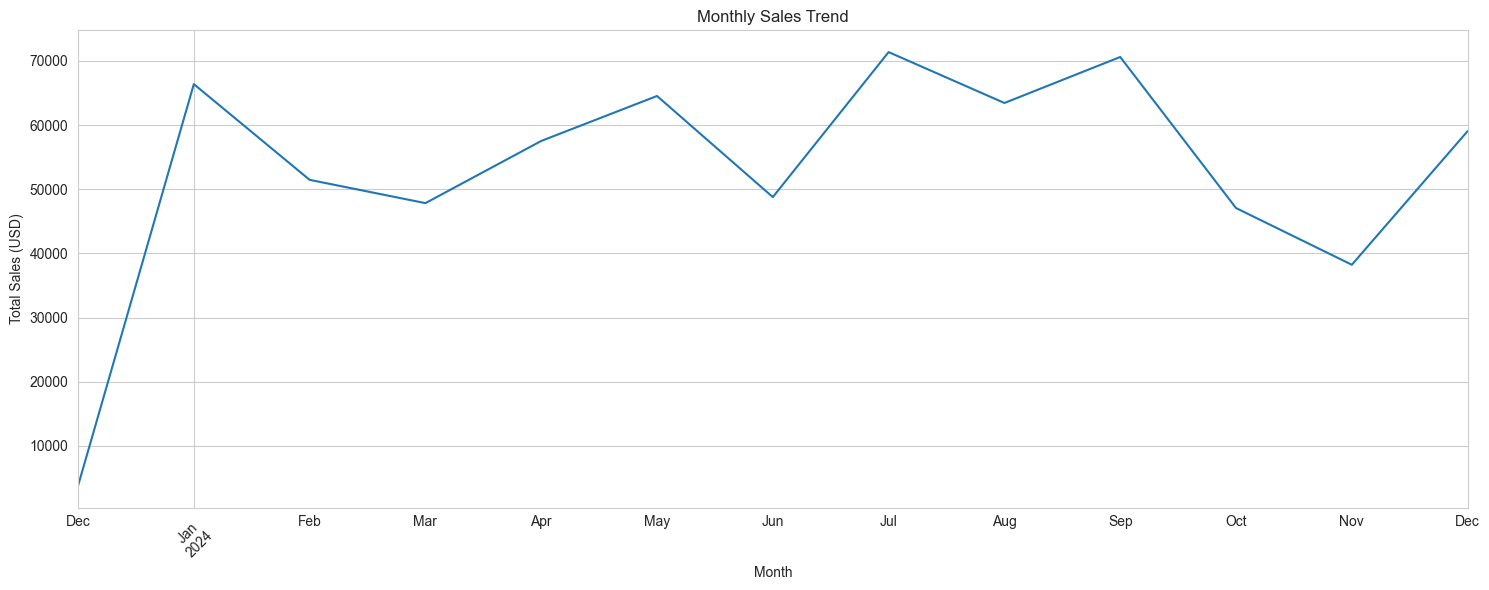

In [9]:
# Transaction Analysis
# Monthly sales trend
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Calculate key metrics
customer_metrics = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'TransactionDate': lambda x: (x.max() - x.min()).days
})

customer_metrics.columns = ['Transaction_Count', 'Total_Spent', 'Customer_Lifetime_Days']
customer_metrics['Avg_Transaction_Value'] = customer_metrics['Total_Spent'] / customer_metrics['Transaction_Count']

In [11]:
# Prepare PDF with dynamic data
def generate_pdf_report():
    try:
        pdf_filename = 'Pratap_Pawar_EDA.pdf'
        c = canvas.Canvas(pdf_filename, pagesize=letter)
        width, height = letter
        
        # Title
        c.setFont("Helvetica-Bold", 16)
        c.drawString(72, height - 40, "Business Insights Report")

        # Customer Distribution by Region
        most_common_region = customers_df['Region'].mode()[0]  # Get the most common region
        c.setFont("Helvetica", 12)
        c.drawString(72, height - 80, "1. Customer Distribution by Region")
        c.drawString(72, height - 100, f"The majority of customers are concentrated in the {most_common_region} region, suggesting strong market presence.")

        # Product Category Performance
        top_category = products_df['Category'].mode()[0]  # Get the most common product category
        category_count = products_df['Category'].value_counts().loc[top_category]  # Count of the top category
        total_products = len(products_df)  # Total number of products
        percentage_top_category = (category_count / total_products) * 100  # Percentage of top category
        c.setFont("Helvetica", 12)
        c.drawString(72, height - 140, "2. Product Category Performance")
        c.drawString(72, height - 160, f"The top category is '{top_category}', which represents {percentage_top_category:.2f}% of all products.")

        # Customer Purchase Patterns
        avg_lifetime_value = customer_metrics['Total_Spent'].mean()
        avg_purchases = customer_metrics['Transaction_Count'].mean()
        c.setFont("Helvetica", 12)
        c.drawString(72, height - 200, "3. Customer Purchase Patterns")
        c.drawString(72, height - 220, f"Average customer lifetime value is ${avg_lifetime_value:.2f}, with {avg_purchases:.2f} purchases per customer.")

        # Price Sensitivity
        min_price = products_df['Price'].min()
        max_price = products_df['Price'].max()
        c.setFont("Helvetica", 12)
        c.drawString(72, height - 260, "4. Price Sensitivity")
        c.drawString(72, height - 280, f"Most products fall within the price range of ${min_price:.2f} - ${max_price:.2f}, indicating price sensitivity.")

        # Seasonal Trends
        # Identifying the top 3 months with highest sales
        transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
        monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
        top_months = monthly_sales.nlargest(3).index.tolist()
        top_months_names = [datetime(2023, month, 1).strftime('%B') for month in top_months]  # Convert to month names
        c.setFont("Helvetica", 12)
        c.drawString(72, height - 320, "5. Seasonal Trends")
        c.drawString(72, height - 340, f"Sales show significant spikes during the months of {', '.join(top_months_names)}, indicating seasonal trends.")

        # Save the PDF
        c.save()

        print(f"Business Insights report generated successfully and saved as {pdf_filename}")

    except Exception as e:
        print(f"An error occurred while generating the PDF report: {e}")

# Call the function to generate the PDF
generate_pdf_report()


Business Insights report generated successfully and saved as Pratap_Pawar_EDA.pdf


In [12]:
# Save metrics for use in other tasks
customer_metrics.to_csv('customer_metrics.csv')